In [2]:
import torch

embeddings = torch.rand(5, 32)
labels = torch.randint(0, len(embeddings), (len(embeddings),))

In [16]:
model_param = torch.load('./checkpoints/ours/Model_ours_cpu_S500_R100_round_0.pt', map_location='cpu', weights_only=True)
for name, param in model_param.items():
    print(f"{name}: {param.shape}")

model.op_encoder.dnn_embedding.weight: torch.Size([6, 100])
model.graph_encoder.layers.0.attn_l: torch.Size([1, 8, 100])
model.graph_encoder.layers.0.attn_r: torch.Size([1, 8, 100])
model.graph_encoder.layers.0.bias: torch.Size([800])
model.graph_encoder.layers.0.fc.weight: torch.Size([800, 100])
model.graph_encoder.layers.1.attn_l: torch.Size([1, 8, 100])
model.graph_encoder.layers.1.attn_r: torch.Size([1, 8, 100])
model.graph_encoder.layers.1.bias: torch.Size([800])
model.graph_encoder.layers.1.fc.weight: torch.Size([800, 100])
model.graph_encoder.layers.2.attn_l: torch.Size([1, 8, 100])
model.graph_encoder.layers.2.attn_r: torch.Size([1, 8, 100])
model.graph_encoder.layers.2.bias: torch.Size([800])
model.graph_encoder.layers.2.fc.weight: torch.Size([800, 100])
model.graph_encoder.layers.3.attn_l: torch.Size([1, 8, 100])
model.graph_encoder.layers.3.attn_r: torch.Size([1, 8, 100])
model.graph_encoder.layers.3.bias: torch.Size([800])
model.graph_encoder.layers.3.fc.weight: torch.Size(

In [29]:
model_param['model.op_encoder.dnn_embedding.weight'].shape

embeddings = model_param['model.op_encoder.dnn_embedding.weight'][:-1, :]
labels = torch.arange(0, len(embeddings))
embeddings.shape, labels

(torch.Size([5, 100]), tensor([0, 1, 2, 3, 4]))

0 con1 1 con3 2 max3 3 input 4 output 5 global node

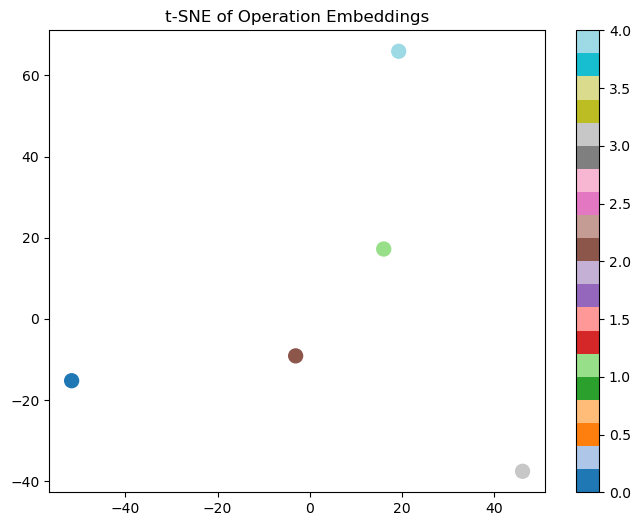

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=2)
emb_2d = tsne.fit_transform(embeddings.numpy())
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels, cmap='tab20', s=100)
plt.title("t-SNE of Operation Embeddings")
plt.colorbar()
plt.show()

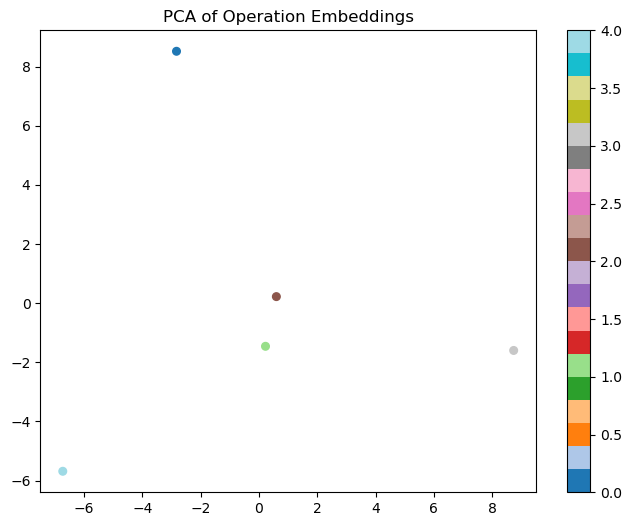

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels, cmap='tab20', s=30)
plt.title("PCA of Operation Embeddings")
plt.colorbar()
plt.show()

与城市 0 最相似的 Top-5 是：[4 2 3 1]


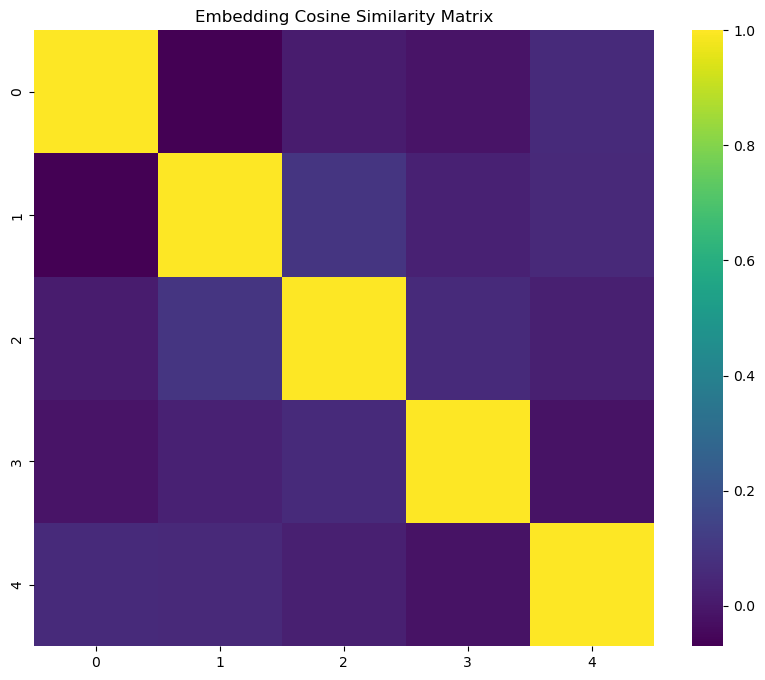

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算余弦相似度矩阵
sim_matrix = cosine_similarity(embeddings)

# 输出与第i个类别最相似的Top-K
i = 0  # 第0个城市
top_k = 5
sim_scores = sim_matrix[i]
top_indices = sim_scores.argsort()[::-1][:top_k + 1]  # +1 是自己

print(f"与城市 {i} 最相似的 Top-{top_k} 是：{top_indices[1:]}")

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap='viridis')
plt.title("Embedding Cosine Similarity Matrix")
plt.show()

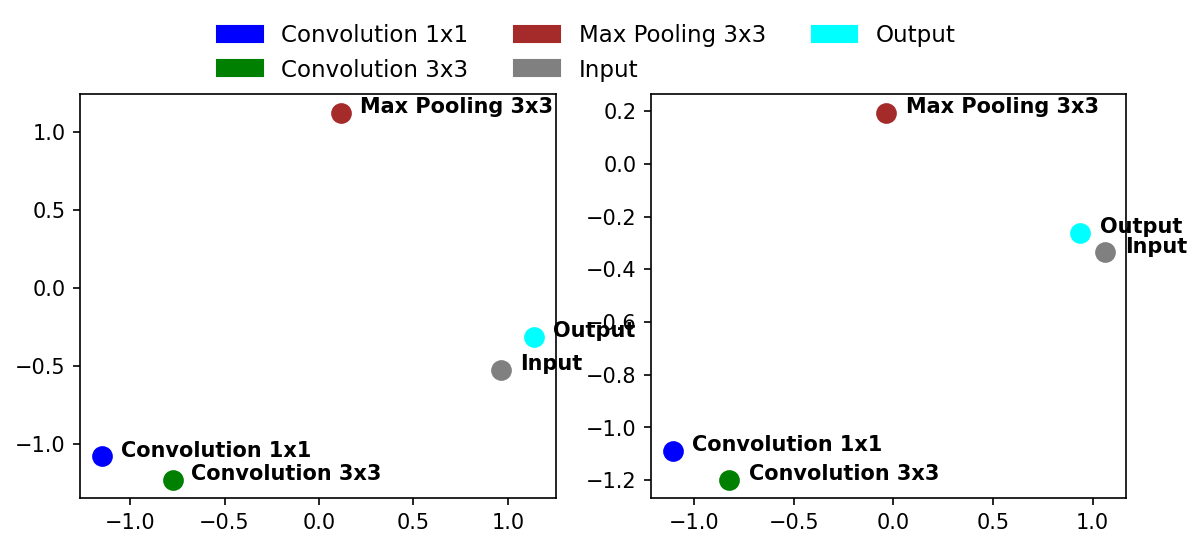

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 定义基础嵌入点
base_points = {
    0: np.array([-1.0, -1.0, 0, 0, 0]),  # Convolution 1x1
    1: np.array([-0.8, -1.2, 0, 0, 0]),  # Convolution 3x3
    2: np.array([0.0, 1.2, 0, 0, 0]),    # Max Pooling 3x3
    3: np.array([1.0, -0.5, 0, 0, 0]),   # Input Node
    4: np.array([1.2, -0.3, 0, 0, 0])    # Output Node
}


base_points2 = {
    0: np.array([-1.0, -1.0, 0, 0, 0]),  # Convolution 1x1
    1: np.array([-0.8, -1.2, 0, 0, 0]),  # Convolution 3x3
    2: np.array([0.0, 0.2, 3, 5, 0]),    # Max Pooling 3x3
    3: np.array([1.0, -0.5, 0, 0, 0]),   # Input Node
    4: np.array([1.2, -0.3, 0, 0, 0])    # Output Node
}

# 标签和颜色
labels = np.array([0, 1, 2, 3, 4])
label_names = ['Convolution 1x1', 'Convolution 3x3', 'Max Pooling 3x3', 'Input', 'Output']
colors = ['blue', 'green', 'brown', 'gray', 'cyan']

# 添加扰动构造 embeddings
embeddings_1 = np.array([
    base_points[i] + np.random.normal(scale=0.10, size=5)
    for i in range(5)
])
embeddings_2 = np.array([
    base_points2[i] + np.random.normal(scale=0.10, size=5)
    for i in range(5)
])

# 图例元素
legend_elements = [Patch(color=colors[i], label=label_names[i]) for i in range(5)]

# 画图
fig, axs = plt.subplots(1, 2, figsize=(9, 3.5), dpi=150)

# 图A
for i in range(5):
    axs[0].scatter(embeddings_1[i, 0], embeddings_1[i, 1], color=colors[i], s=80)
    axs[0].text(embeddings_1[i, 0]+0.1, embeddings_1[i, 1], label_names[i], fontsize=10, weight='bold')

# 图B
for i in range(5):
    axs[1].scatter(embeddings_2[i, 0], embeddings_2[i, 1], color=colors[i], s=80)
    axs[1].text(embeddings_2[i, 0]+0.1, embeddings_2[i, 1], label_names[i], fontsize=10, weight='bold')

# 顶部共享图例
fig.legend(handles=legend_elements,
           loc='upper center',
           ncol=3,
           fontsize=11,
           frameon=False,
           bbox_to_anchor=(0.5, 1.053))

# 图下方标题
# fig.text(0.5, -0.05, "PCA-projected operation embeddings across CPU and GPU datasets", 
        #  ha='center', fontsize=13)

# 调整整体布局
# plt.tight_layout(rect=[0, 0, 1, 0.97])

# 保存为 PDF 文件（确保运行目录下有写入权限）
plt.savefig("operation_embeddings_cpu_gpu.pdf", bbox_inches='tight', format='pdf')

plt.show()

In [127]:
11 * 240

2640